# Sarvesh Makane
## Data Science& Business Analytics 
#### TASK 1 -Prediction using Supervised ML
##### To Predict the percentage of marks of the students based on the number of hours they studied

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df=pd.read_csv("student_data.csv")
df.head(7)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


##### SEPERATING DEPENDENT AND INDEPENDENT VARIABLES

In [6]:
#HOURS STUDIED - INDEPENDENT VARIABLE
#SCORES OBTAINED - DEPENDENT VARIABLE

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
print("Hours:")
print(X[:10])
print("\nScores:")
print(y[:])

Hours:
[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]]

Scores:
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


##### PLOTTING REGRESSION LINE

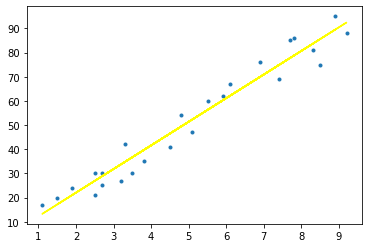

In [8]:
m,c = np.polyfit(X.ravel(), y, 1)
plt.plot(X.ravel(), y, '.')
plt.plot(X.ravel(), m*X+c,color="yellow")

In [ ]:
#ANALYZING THE PLOT, WE CAN SEE THAT BOTH VARIABLES (Hours and Scores) ARE POSITIVELY CORELATED

##### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [10]:
student_reg=LinearRegression()
student_reg.fit(X_train,y_train)

LinearRegression()

##### FITTING DATA INTO THE MODEL

In [11]:
#PREDICTING MARKS OBTAINED AND STORING IT IN y_pred VARIABLE

y_pred=student_reg.predict(X_test)

In [14]:
print(y_pred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


In [15]:
#VISUALIZING PREDICTED MARKS

predicted = pd.DataFrame({'Hours': [i[0] for i in X_test], 'Predicted Marks': [i for i in y_pred]})
predicted

,Hours,Predicted Marks
0,1.5,17.053665
1,3.2,33.694229
2,7.4,74.806209
3,2.5,26.842232
4,5.9,60.123359
5,3.8,39.567369
6,1.9,20.969092
7,7.8,78.721636


##### COMPARING ACTUAL MARKS TO PREDICTED MARKS

In [17]:
new_Score= pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})
new_Score

,Actual Marks,Predicted Marks
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


##### EVALUATION OF MODEL

In [20]:
print("SLOPE: {}".format(*student_reg.coef_))
print("Y-INTERCEPT: {}".format(student_reg.intercept_))

SLOPE: 9.788566686749046
Y-INTERCEPT: 2.370815382341881


In [23]:
from sklearn.metrics import r2_score, mean_squared_error
r2_Reg=r2_score(y_test,y_pred)
rmse_Reg=np.sqrt(mean_squared_error(y_test,y_pred))

print("R2 SCORE:")
print(r2_Reg)
print("\n")
print("ROOT MEAN SQUARED ERROR:")
print(rmse_Reg)

R2 SCORE:
0.9568211104435257


ROOT MEAN SQUARED ERROR:
4.792191274636315


In [ ]:
#R2 SCORE OF 0.956 SIGNIFIES THAT OUR MODEL IS HIGHLY ACCURATE

#### What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?

In [24]:
hr=[9.25]
ans=student_reg.predict([hr])
print("Score = {}".format(*ans))

Score = 92.91505723477056


##### According to the regression model if a student studies for 9.25 hours a day he is likely to score 92.915 marks